# Importing libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sbn
import matplotlib.pyplot as plt
%matplotlib inline

#### Read the dataset and display some info about it, We notice that there were 891 persons on titanic, Age column includes a lot of null values so we should take care dealing with ages, The mean fare of titanic ship is approximately 32.2 and the fare has a high standard deviation of about 50. other features statistics need further investigation

In [2]:
df1=pd.read_csv('train.csv')
print(df1.head())
print('-------------**************--------------')
print(df1.info())
print('-------------**************--------------')
print(df1.describe())
print('-------------**************--------------')

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
--

#### Filling the null values of male passengers on titanic by the mean of the other known male ages so we can have better insights about the distribution of male ages
#### Average male age is 30.73

30.726644591611475


C:\Users\lenovo\AppData\Local\Temp\ipykernel_8416\1483445215.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.fillna(value=mean_male_age,inplace=True)


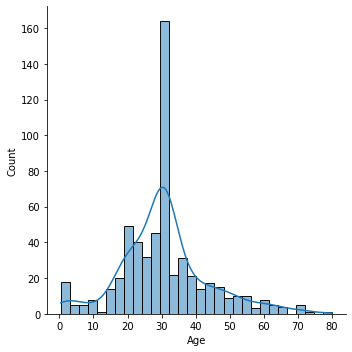

In [3]:
def boolfcn(i):
    if i==True:
        return False
    else:
        return True
df2=df1[df1['Sex']=='male']['Age']
mean_male_age=df2[df2.isnull().apply(boolfcn)].mean()
df2.fillna(value=mean_male_age,inplace=True)
sbn.displot(df2,kde=True,bins=30)
print(df2.mean())

#### Similar process for females
#### Average female age is 27.92

C:\Users\lenovo\AppData\Local\Temp\ipykernel_8416\2703862018.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3.fillna(value=mean_female_age,inplace=True)


27.91570881226053


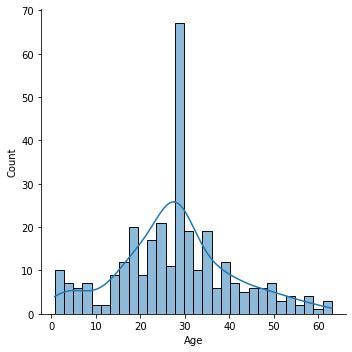

In [4]:
def boolfcn2(i):
    if i==True:
        return False
    else:
        return True
df3=df1[df1['Sex']=='female']['Age']
mean_female_age=df3[df3.isnull().apply(boolfcn2)].mean()
df3.fillna(value=mean_female_age,inplace=True)
sbn.displot(df3,kde=True,bins=30)
print(df3.mean())

#### Plotting the average age of males vs average age of females, we notice that the average male age is higher than that of female

C:\Users\lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

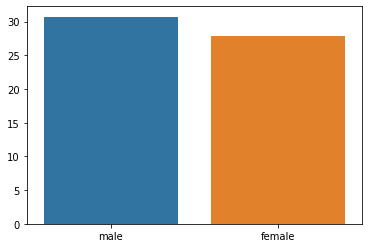

In [5]:
sbn.barplot(['male','female'],[df2.mean(),df3.mean()])

#### Drawing the boxplot of ages of men, we can see that there is a lot of outliers

C:\Users\lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

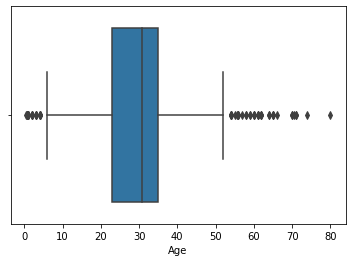

In [6]:
sbn.boxplot(df2)

#### Drawing the boxplot of ages of women, we can see that there is small number of outliers

C:\Users\lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

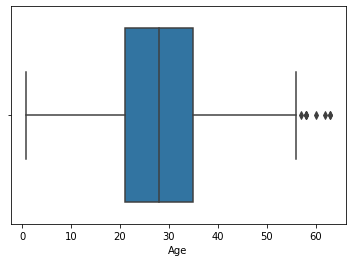

In [7]:
sbn.boxplot(df3)

#### using countplot, we can observe that count of persons that didn't survive is greater than that survived, above 60% of people didn't survive

C:\Users\lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Survived', ylabel='count'>

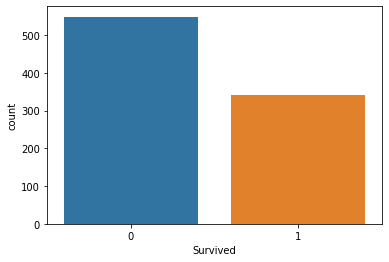

In [8]:
sbn.countplot(df1['Survived'])

C:\Users\lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

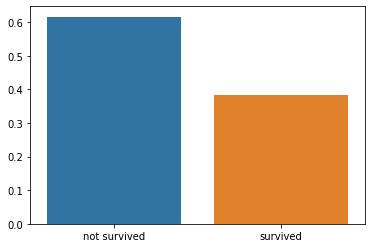

In [9]:
sbn.barplot(['not survived','survived'],[sum(df1['Survived']==0)/df1['Survived'].count(),sum(df1['Survived']==1)/df1['Survived'].count()])

#### Most males didn't survive, Above 80% of men didn't survive

C:\Users\lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Survived', ylabel='count'>

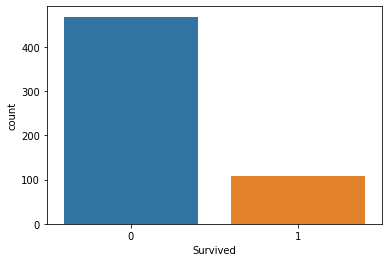

In [10]:
df4=df1[df1['Sex']=='male']
sbn.countplot(df4['Survived'])

C:\Users\lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

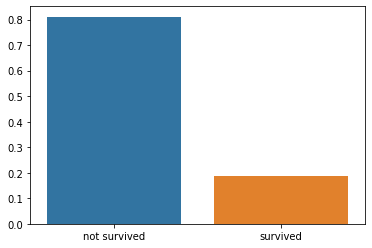

In [11]:
sbn.barplot(['not survived','survived'],[sum(df4['Survived']==0)/df4['Survived'].count(),sum(df4['Survived']==1)/df4['Survived'].count()])

#### Most females survived, Above 70% of women survived

C:\Users\lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Survived', ylabel='count'>

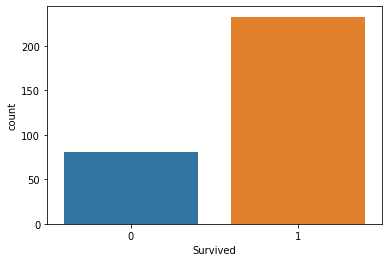

In [12]:
df5=df1[df1['Sex']=='female']
sbn.countplot(df5['Survived'])

C:\Users\lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

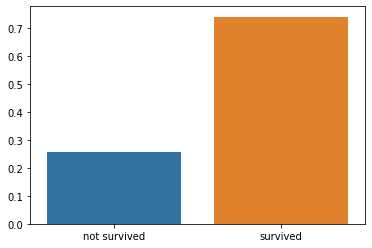

In [13]:
sbn.barplot(['not survived','survived'],[sum(df5['Survived']==0)/df5['Survived'].count(),sum(df5['Survived']==1)/df5['Survived'].count()])

#### Most of fares presented in the dataset are outliers

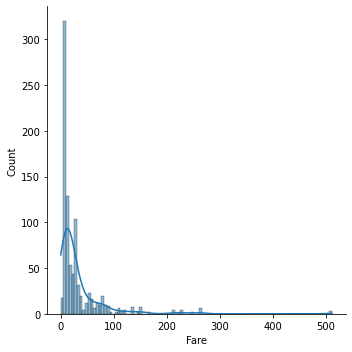

In [14]:
sbn.displot(df1['Fare'],kde=True,bins=100)

C:\Users\lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Fare'>

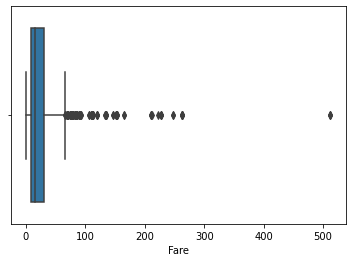

In [15]:
sbn.boxplot(df1['Fare'])

#### Most of passengers on titanic are of class 3 (Above 50%), the 2nd category is class 1 (around 25%)

C:\Users\lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Pclass', ylabel='count'>

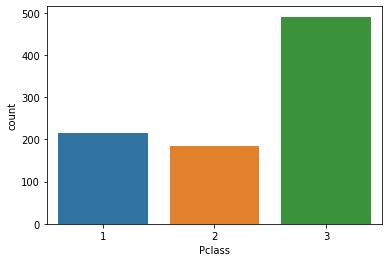

In [16]:
sbn.countplot(df1['Pclass'])

C:\Users\lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

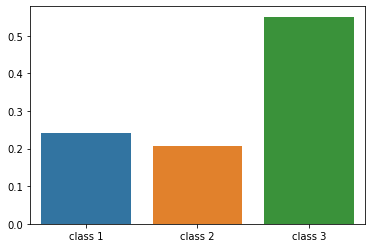

In [17]:
sbn.barplot(['class 1','class 2','class 3'],[sum(df1['Pclass']==1)/df1['Pclass'].count(),sum(df1['Pclass']==2)/df1['Pclass'].count(),sum(df1['Pclass']==3)/df1['Pclass'].count()])

#### Using pivot_table and heatmap, we noticed the following:
#### 1) Average age of females of class 1 is 35 
#### 2) Average age of females of class 2 is 29
#### 3) Average age of females of class 3 is 22 
#### 1) Average age of males of class 1 is 41 
#### 2) Average age of males of class 2 is 31
#### 3) Average age of males of class 3 is 27

<AxesSubplot:xlabel='Pclass', ylabel='Sex'>

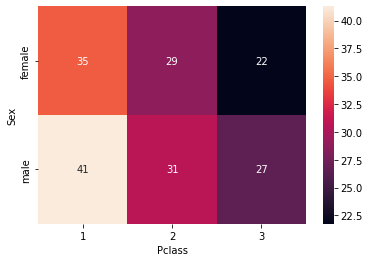

In [18]:
df6=df1.pivot_table(values='Age',index='Sex',columns='Pclass')
sbn.heatmap(df6,annot=True)

#### Average females that didn't survive is 25
#### Average females that survived is 29
#### Average males that didn't survive is 32
#### Average males that survived is 27

<AxesSubplot:xlabel='Survived', ylabel='Sex'>

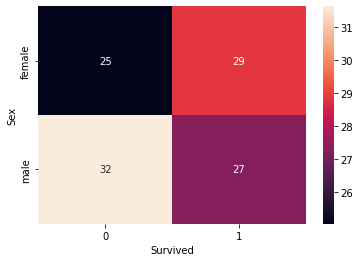

In [19]:
df7=df1.pivot_table(values='Age',index='Sex',columns='Survived')
sbn.heatmap(df7,annot=True)